<a href="https://colab.research.google.com/github/vishwastanwar1402/Mini-Project/blob/main/Image-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
!pip



Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper command used for command completion.
  debug                       Show information useful for debugging.
  help                        Show help for commands.

General Options:
  -h, --help
  Show help.
  --isola

In [1]:
!pip install ipython-autotime
%load_ext autotime



time: 2.16 ms (started: 2021-02-21 19:39:29 +00:00)


In [2]:
!pip install bing-image-downloader

time: 2.93 s (started: 2021-02-21 19:40:06 +00:00)


In [3]:
!mkdir images

time: 119 ms (started: 2021-02-21 19:40:46 +00:00)


In [4]:
from bing_image_downloader import downloader
downloader.download("sun",limit=30,output_dir="images",adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 31 Images on Page 1.


[%] Downloading Image #1 from https://static.independent.co.uk/s3fs-public/thumbnails/image/2016/02/03/09/sun.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.nasa.gov/sites/default/files/thumbnails/image/oct_26_x2_304-171.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.ytimg.com/vi/UJTo1Hc8fAk/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://kingofromania.files.wordpress.com/2012/10/happy-sun.gif
[%] File Downloaded !

[%] Downloading Image #5 from https://d.ibtimes.co.uk/en/full/1615785/solar-eclipse.gif
[%] File Downloaded !

[%] Downloading Image #6 from https://www.bing.com/th/id/OGC.9edf4414aea4a11e2af2c53632811524?pid=1.7&amp;rurl=https%3a%2f%2fd.ibtimes.co.uk%2fen%2ffull%2f1615785%2fsolar-eclipse.gif&amp;ehk=Guf%2bANKeETw3Ib4OPKZhzxrVj9y1P8AcfhIRX3gGc%2bc%3d
[!] Issue getting: https://www.bing.com/th/id/OGC.9edf4414aea4a11e2af2c53632811524?pid=1.7&amp;r

In [5]:
!cd images


time: 123 ms (started: 2021-02-21 19:45:23 +00:00)


In [11]:
!rm -f sun

time: 122 ms (started: 2021-02-21 19:51:01 +00:00)


In [12]:
from bing_image_downloader import downloader
downloader.download("rose",limit=30,output_dir="images",adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/Rose_Kardinal_crop.jpg/1200px-Rose_Kardinal_crop.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://enablelc.org/wp-content/uploads/2017/01/BS-Yellow-rose.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://susanrushtondotnet.files.wordpress.com/2015/03/orange-rose.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.naturehills.com/media/catalog/product/cache/35c1080e597d6a74b42d0d88ced836c1/e/a/easy-elegance-paint-the-town-rose-800x800.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.cowellsgc.co.uk/files/images/webshop/rose-my-lovely-mum-keep-smiling-1546548287_l.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.theperfectrose.com/FS/STORE/104/2/Pink_Promise.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.florissa.com/wp-content/uploads/2

In [62]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

DATADIR='/content/images'
CATEGORIES=['rose','sun']
for category in CATEGORIES:
  class_num=CATEGORIES.index(category)
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    if img[-3:] in {'jpg', 'png'}:
     image_array=imread(os.path.join(path,img))
    
     image_resized=resize(image_array,(150,150,3))
    
     flat_data.append(image_resized.flatten())
     images.append(image_resized)
     target.append(class_num)

flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

time: 37.4 s (started: 2021-02-21 23:17:15 +00:00)


In [63]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 9.69 ms (started: 2021-02-21 23:18:53 +00:00)


<BarContainer object of 2 artists>

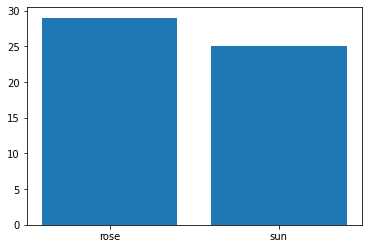

time: 137 ms (started: 2021-02-21 23:20:46 +00:00)


In [65]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 13.1 ms (started: 2021-02-21 23:23:23 +00:00)


In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[{'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 29.8 s (started: 2021-02-21 23:28:35 +00:00)


In [74]:
y_pred=clf.predict(x_test)

time: 59.4 ms (started: 2021-02-21 23:33:40 +00:00)


In [68]:
y_test

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

time: 2.65 ms (started: 2021-02-21 23:31:03 +00:00)


In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.1 ms (started: 2021-02-21 23:32:04 +00:00)


In [75]:
accuracy_score(y_pred,y_test)

0.7647058823529411

time: 6.01 ms (started: 2021-02-21 23:33:45 +00:00)


In [76]:
confusion_matrix(y_pred,y_test)

array([[6, 2],
       [2, 7]])

time: 5.47 ms (started: 2021-02-21 23:35:04 +00:00)


In [79]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 25.2 ms (started: 2021-02-21 23:39:09 +00:00)


In [81]:
model=pickle.load(open('img_model.p','rb'))

time: 15.9 ms (started: 2021-02-21 23:40:22 +00:00)


enter your URLhttps://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/The_Sun_by_the_Atmospheric_Imaging_Assembly_of_NASA%27s_Solar_Dynamics_Observatory_-_20100819.jpg/220px-The_Sun_by_the_Atmospheric_Imaging_Assembly_of_NASA%27s_Solar_Dynamics_Observatory_-_20100819.jpg
predicted otput : sun


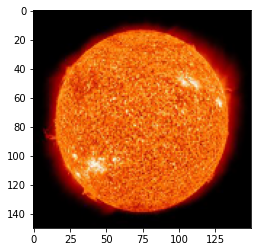

time: 3.43 s (started: 2021-02-21 23:51:46 +00:00)


In [86]:
flat_data=[]
url=input('enter your URL')
img=imread(url)
image_resized=resize(img,(150,150,3))
flat_data.append(image_resized.flatten())
flat_data=np.array(flat_data)
plt.imshow(image_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'predicted otput : {y_out}')
